<a href="https://colab.research.google.com/github/marcosilvaa/data_projects/blob/main/Bitcoin_White_Paper_Word_Cloud_Artigo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bitcoin**




<center><img alt="Colaboratory logo" width="50%" src="https://cdn.pixabay.com/photo/2018/01/18/07/31/bitcoin-3089728_960_720.jpg"></center>


O ***Bitcoin*** é um ativo descentralizado criado por Satoshi Nakamoto, até hoje não se sabe se trata-se de uma pessoa uma organização. O fato é, sua criação veio para revolucionar o sistema monetário mundial, trazendo liberdade às pessoas quando o assunto é cuidar do seu próprio dinheiro.



# O Início

Em 31 de Outubro de 2008, após a grande crise dos *sub-primes* nos Estados Unidos, o *WhitePaper* do bitcoin veio a público, explicando como esse novo sistema financeiro funcionaria.

Tomei a liberdade de criar uma *Nuvem de Palavras* com esse documento para podermos ver quais termos foram mais citados ao longo das 9 páginas desse documento.

In [ ]:
# Instalando pacotes
!pip install textract
!pip install wordcloud
!pip install nltk

Utilizarei a biblioteca Textract para extrair o conteúdo do arquivo em PDF. A biblioteca NLTK é quem vai nos ajudar a lidar com as *stopwords* enquanto a biblioteca WordCloud é quem vai ser responsável em criar a nossa imagem. 

In [ ]:
#importando pacotes
import textract
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import nltk.corpus as stopwords
import nltk

nltk.download('stopwords')


Aqui vamos criar uma função que colete o PDF e retorna o seu texto em formato string.

In [2]:
# convertendo pdf para string
def read_file_textract(filepath):
  text = textract.process(filepath)
  return text.decode("utf-8")

Criando variável com o caminho para encontrar o PDF.

In [4]:
WhitePaper = "/content/bitcoin.pdf"
texto = read_file_textract(WhitePaper)

WhitePaper_pt = "/content/bitcoin_pt.pdf"
texto_pt = read_file_textract(WhitePaper_pt)

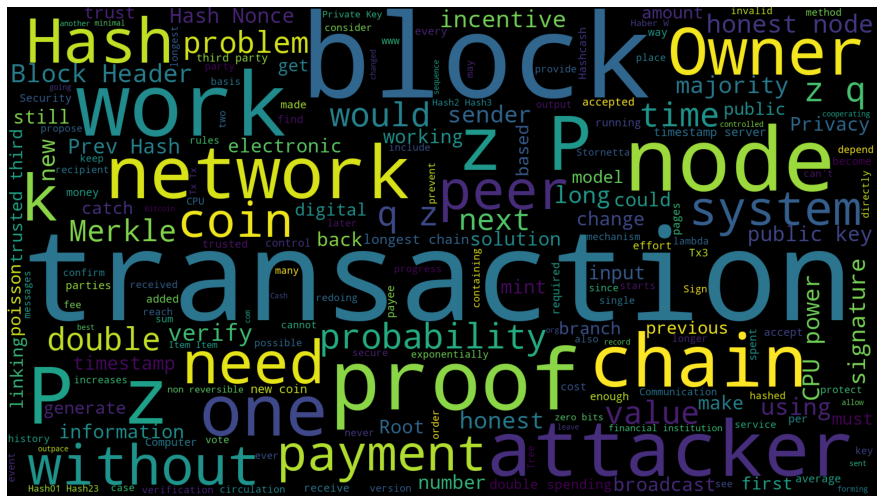

In [5]:
# lista de stopword
stopwords = set(STOPWORDS)
stopwords = nltk.corpus.stopwords.words('english')

# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=900).generate(texto)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(16,9))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud);
wordcloud.to_file("btc_whitepaper_wordcloud.png")

### Bônus 

Vamos agora repetir o mesmo processo porem com a versão traduzida do arquivo. Será necessário complementar a lista das *stopwords*, confira à seguir:


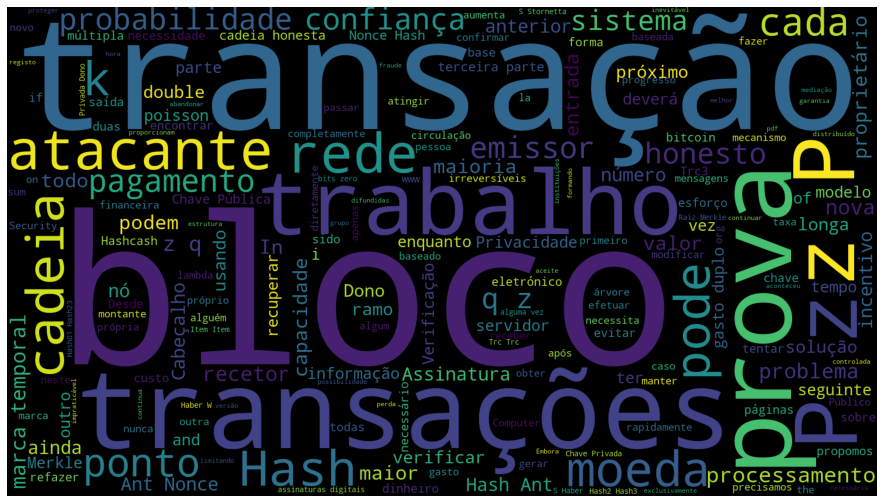

In [6]:
# lista de stopword
stopwords = set(STOPWORDS)
stopwords.update(["da", "meu", "em", "você", "de", "ao", "os","pode", "cada", 'para'])
stopwords = nltk.corpus.stopwords.words('portuguese')

# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=900).generate(texto_pt)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(16,9))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud);
wordcloud.to_file("btc_whitepaper_pt_wordcloud.png")